# 확률적 경사 하강법(SGD, Stochastic Gradient Descent) 
* gradient가 0이되는, 순간 기울기 값이 0이 되는 지점을 찾는다. 
* 학습률을 너무 크게 잡으면 수렴하지 않고 발산한다. 
* 경사하강법은 한 번 업데이트 할 때마다 전체 데이터를 미분하므로 속도가 느릴 뿐 아니라, 최적 해를 찾기 전에 최적화 과정이 멈출수도 있음. 확률적 경사하강법은 이러한 단점을 보완한 방법
* 손실함수: 나쁜 정도를 측정하는 함수. 구성이 듬성듬성하다면 경사하강법을 이용해 조금씩 움직일 수 없다. 즉, 미분가능하지 않다. 

## 로지스틱 손실 함수
* 회귀 모델
    - 평균절댓값오차, 평균제곱근오차를 사용 ==> 미분가능
    - 손실함수와 측정지표 동일
* 분류모델
    - 정확도로 모델의 성능 측정
    - 로지스틱 손실함수 최적화 ==> 미분가능하지 않을때

## 확률적 경사 하강법(SGDClassifier)

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Weight']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state = 42)

In [4]:
# 확률적 경사하강법은 반드시 스케일을 조정해야함. 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

In [6]:
#손실함수 log_loss(로지스틱 손실함수)
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.6218487394957983
0.525


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [7]:
#손실함수 log_loss(로지스틱 손실함수)    loss='log'도 로지스틱손실함수
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))     #컴퓨터기기 성능에 따라 결과값이 다르게나올 수 있다. 

0.6218487394957983
0.525


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [8]:
# 기존 훈련했던 w,b를 업데이트
# 확률적배치만 제공(사이킷런)
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))     #컴퓨터기기 성능에 따라 결과값이 다르게나올 수 있다.

0.7142857142857143
0.75


## 에포크와 과대/과소적합

In [9]:
import numpy as np

sc = SGDClassifier(loss = 'log_loss', random_state= 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [10]:
#300번 에포크
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

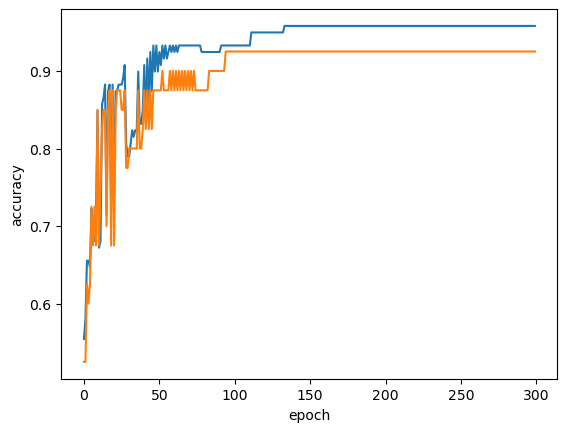

In [11]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [12]:
#max_iter=100:100번 반복, tol=None자동으로 멈추지 말고
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.907563025210084
0.925


In [13]:
# 손실함수 변경: loss='hinge'
#max_iter=100:100번 반복, tol=None자동으로 멈추지 말고
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42) 
sc.fit(train_scaled, train_target)     #SGDClassifier(여기에 shift + enter)하면 설명 볼 수 있음
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9243697478991597
0.925
